# 이변량_범주 vs 범주

# 1.환경준비

## (1) 라이브러리

In [4]:
import pandas as pd
import numpy as np
# import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

## (2) 데이터 불러오기
* 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [6]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


# 2.범주 --> 범주

## (1) 교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [8]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex']) 

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [10]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns') # 열 기준 으로 비율 

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [16]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index') # 행을 기준으로

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [18]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'all') # 행, 열 전체 기준 

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


## (2) 시각화
* mosaic
* (참조) 100% Stacked Bar


1) Pclass --> Survived

* mosaic plot
    * mosaic(dataframe, [ feature, target])

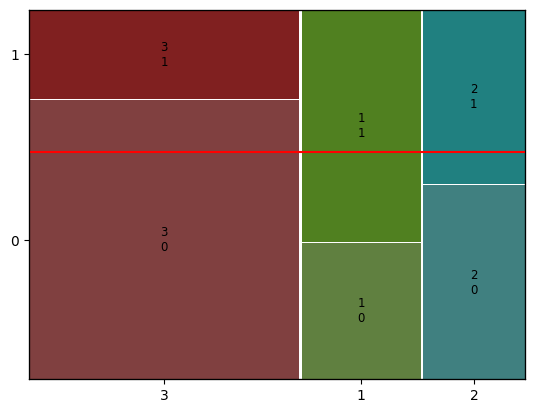

In [22]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
# mosaic(데이터프레임 ,[x축, y] )
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r') # 수평선 긋기  y축 좌표 필요 

plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


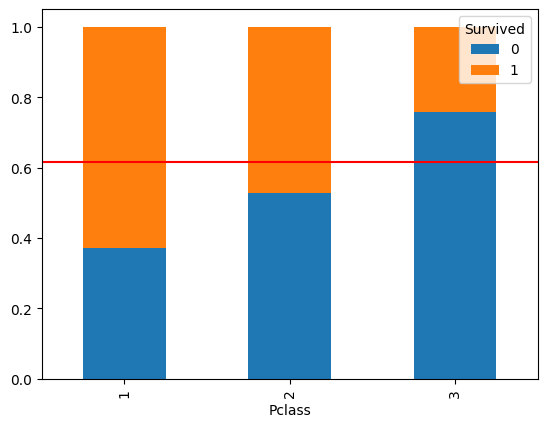

In [24]:
# 비율만 보이고 이 순서대로 코드를 작성해야 함 ********************
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

비율만 비교하므로 양에 대한 비교는 할 수 없다!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 관계에 대해서 교차표와 시각화(mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


* [문1] Sex --> Survived

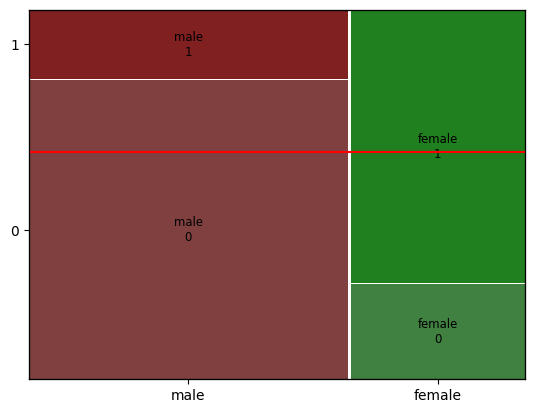

In [40]:
mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1-titanic['Survived'].mean(), color = 'r') # 전체 사망률 
plt.show()

In [ ]:
# 비율만 보이고 이 순서대로 코드를 작성해야 함 ********************
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

* [문2] Embarked --> Survived

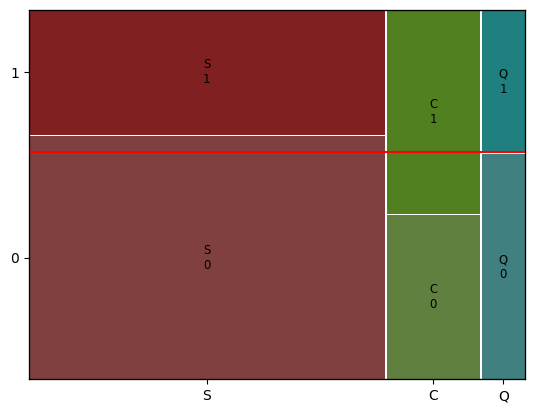

In [42]:
mosaic(titanic, ['Embarked','Survived'])
plt.axhline(1-titanic['Survived'].mean(), color = 'r') # 전체 사망률 
plt.show()

* [문3] Title --> Survived

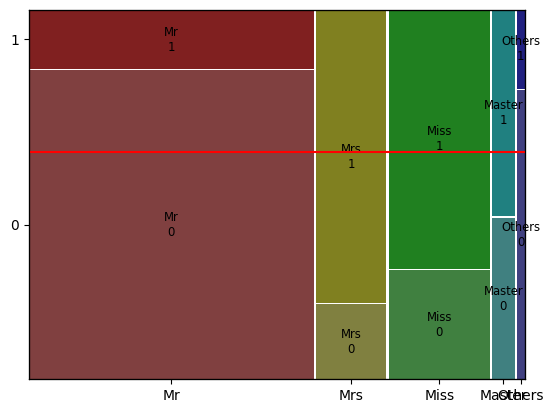

In [44]:
mosaic(titanic, ['Title','Survived'])
plt.axhline(1-titanic['Survived'].mean(), color = 'r') # 전체 사망률 
plt.show()

## (3) 수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다.

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [46]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [48]:
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------


Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 수치화 해 봅시다.

* [문1] Sex --> Survived

In [54]:
print(pd.crosstab(titanic['Sex'], titanic['Survived']))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 260 즉  자유도 1 보다 약 8배 이상 크므로 차이가 큼 ,  성별에 따라 생존률 차이가 큼 

Survived    0    1
Sex               
female     81  233
male      468  109
Survived    0    1
Sex               
female     81  233
male      468  109
--------------------------------------------------


Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

* [문2] Embarked --> Survived

In [60]:
print(pd.crosstab(titanic['Embarked'], titanic['Survived']))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(titanic['Embarked'], titanic['Survived'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 25 즉  자유도 2 보다 약 12배 이상 크므로 차이가 큼 

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
--------------------------------------------------


Chi2ContingencyResult(statistic=25.964452881874784, pvalue=2.3008626481449577e-06, dof=2, expected_freq=array([[103.51515152,  64.48484848],
       [ 47.44444444,  29.55555556],
       [398.04040404, 247.95959596]]))

* [문3] Title --> Survived

In [58]:
print(pd.crosstab(titanic['Title'], titanic['Survived']))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(titanic['Title'], titanic['Survived'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 289 즉  자유도 4 보다 약 72배 이상 크므로 차이가 큼 

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3
Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3
--------------------------------------------------


Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))

# 3.복습문제

* 항공기 탑승객의 만족도와 관련 있는 요인을 분석해 봅시다.
* 약 5천명의 탑승객에 대해서 탑승 경험을 바탕으로 데이터셋이 구성되어 있습니다.
    * Target
        * 탑승 만족도(satisfaction) : 만족 = 1, 불만 = 0
    * Feature
        * 성별, 나이, 여행타입, 객실등급, 비행거리, 객실등급, 비행거리, 식음료 만족도, 출발지연시간


In [73]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Air_Satisfaction.csv'
cols = ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Food and drink',
        'Departure Delay in Minutes', 'satisfaction']
data = pd.read_csv(path, usecols = cols)
data['satisfaction'] = np.where(data['satisfaction'] =='satisfied', 1 ,0)
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Food and drink,Departure Delay in Minutes,satisfaction
0,Male,13,Personal Travel,Eco Plus,460,5,25,0
1,Male,25,Business travel,Business,235,1,1,0
2,Female,26,Business travel,Business,1142,5,0,1
3,Female,25,Business travel,Business,562,2,11,0
4,Male,61,Business travel,Business,214,4,0,1


다음의 변수 관계에 대해 그래프와 가설검정으로 분석하시오.

In [79]:
target = 'satisfaction'

## (1) Gender --> Satisfaction

satisfaction     0     1
Gender                  
Female        1463  1088
Male          1362  1087
satisfaction     0     1
Gender                  
Female        1463  1088
Male          1362  1087
--------------------------------------------------


Chi2ContingencyResult(statistic=1.461470294787199, pvalue=0.2266963263128574, dof=1, expected_freq=array([[1441.315, 1109.685],
       [1383.685, 1065.315]]))

* 시각화

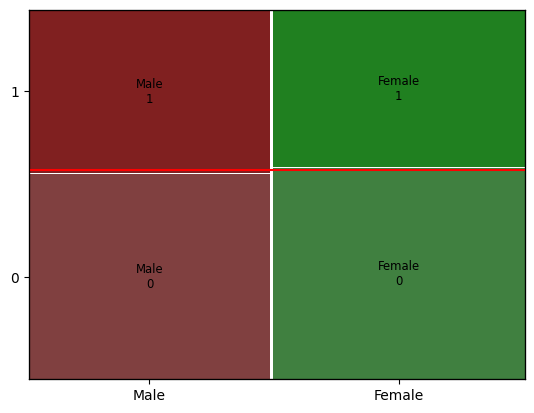

In [87]:
mosaic(data, [ 'Gender','satisfaction'])
plt.axhline(1- data['satisfaction'].mean(), color = 'r') # 수평선 긋기  y축 좌표 필요 

plt.show()

* 수치화 : 카이제곱검정

In [89]:
print(pd.crosstab(data['Gender'], data[target]))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(data['Gender'], data[target])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 260 즉  자유도 1 보다 약 8배 이상 크므로 차이가 큼 ,  성별에 따라 생존률 차이가 큼 

satisfaction     0     1
Gender                  
Female        1463  1088
Male          1362  1087
satisfaction     0     1
Gender                  
Female        1463  1088
Male          1362  1087
--------------------------------------------------


Chi2ContingencyResult(statistic=1.461470294787199, pvalue=0.2266963263128574, dof=1, expected_freq=array([[1441.315, 1109.685],
       [1383.685, 1065.315]]))

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 

## (2) Type of Travel --> Satisfaction

* 시각화

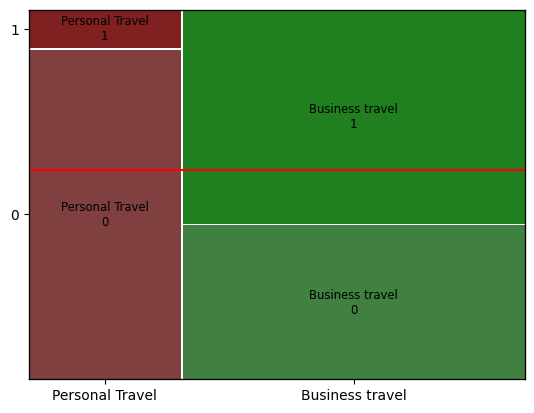

In [92]:
mosaic(data, [ 'Type of Travel','satisfaction'])
plt.axhline(1- data['satisfaction'].mean(), color = 'r') # 수평선 긋기  y축 좌표 필요 

plt.show()

* 수치화 : 카이제곱검정

In [95]:
print(pd.crosstab(data['Type of Travel'], data[target]))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(data['Type of Travel'], data[target])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 260 즉  자유도 1 보다 약 8배 이상 크므로 차이가 큼 ,  성별에 따라 생존률 차이가 큼 

satisfaction        0     1
Type of Travel             
Business travel  1446  2013
Personal Travel  1379   162
satisfaction        0     1
Type of Travel             
Business travel  1446  2013
Personal Travel  1379   162
--------------------------------------------------


Chi2ContingencyResult(statistic=984.2929106941075, pvalue=4.6606654284535553e-216, dof=1, expected_freq=array([[1954.335, 1504.665],
       [ 870.665,  670.335]]))

* 파악된 내용을 기술해 봅시다.

## (3) Class --> Satisfaction

* 시각화

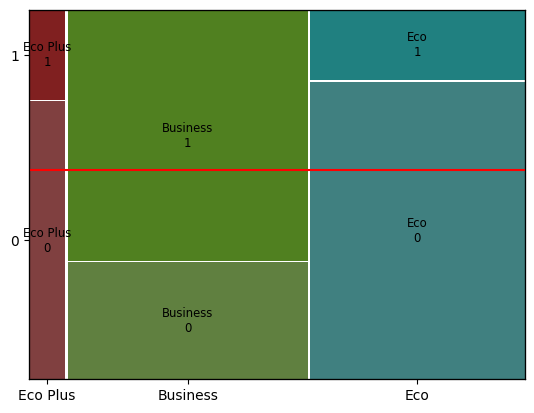

In [99]:
mosaic(data, [ 'Class','satisfaction'])
plt.axhline(1- data['satisfaction'].mean(), color = 'r') # 수평선 긋기  y축 좌표 필요 

plt.show()

* 수치화 : 카이제곱검정

In [97]:
print(pd.crosstab(data['Class'], data[target]))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(data['Class'], data[target])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 260 즉  자유도 1 보다 약 8배 이상 크므로 차이가 큼 ,  성별에 따라 생존률 차이가 큼 

satisfaction     0     1
Class                   
Business       777  1663
Eco           1765   420
Eco Plus       283    92
satisfaction     0     1
Class                   
Business       777  1663
Eco           1765   420
Eco Plus       283    92
--------------------------------------------------


Chi2ContingencyResult(statistic=1182.4142005723843, pvalue=1.745897261154762e-257, dof=2, expected_freq=array([[1378.6  , 1061.4  ],
       [1234.525,  950.475],
       [ 211.875,  163.125]]))

* 파악된 내용을 기술해 봅시다.

## (4) Food and drink --> Satisfaction

* 시각화

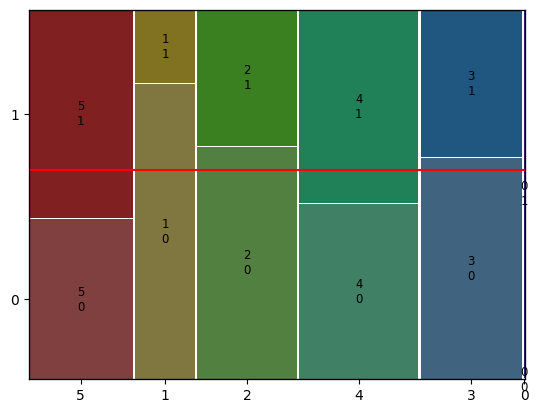

In [101]:
mosaic(data, [ 'Food and drink','satisfaction'])
plt.axhline(1- data['satisfaction'].mean(), color = 'r') # 수평선 긋기  y축 좌표 필요 

plt.show()

* 수치화 : 카이제곱검정

In [103]:
print(pd.crosstab(data['Food and drink'], data[target]))
# 1) 먼저 교차표 집계- normalize 하면 안 됨
table = pd.crosstab(data['Food and drink'], data[target])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table) # static 이 260 즉  자유도 1 보다 약 8배 이상 크므로 차이가 큼 ,  성별에 따라 생존률 차이가 큼 

satisfaction      0    1
Food and drink          
0                 0    4
1               497  123
2               650  380
3               628  418
4               583  643
5               467  607
satisfaction      0    1
Food and drink          
0                 0    4
1               497  123
2               650  380
3               628  418
4               583  643
5               467  607
--------------------------------------------------


Chi2ContingencyResult(statistic=284.02977867350586, pvalue=2.711195524646914e-59, dof=5, expected_freq=array([[  2.26,   1.74],
       [350.3 , 269.7 ],
       [581.95, 448.05],
       [590.99, 455.01],
       [692.69, 533.31],
       [606.81, 467.19]]))

* 파악된 내용을 기술해 봅시다.